## Representing data and feature engineering

The following exercise is adapted from:
Introduction to Machine Learning with Python by Andreas C. Müller, Sarah Guido


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# allow multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data scaling
Some algorithms are very sensitive to the scaling of the data. 
Therefore, a common practice is to adjust the features so that the data representation is more suitable for these algorithms.
Let's visualize two different scaling tecniques: normalization and stadardization.
First, let's generate a small synthetic dataset with sklearn's *make_blobs()*.

In [ ]:
from sklearn.datasets import make_blobs
# make synthetic data
X, y = make_blobs(n_samples=50, centers=2, random_state=1, cluster_std=3)
plt.figure(1)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y) 
plt.title("our dataset")
plt.show()

The first feature (the x-axis value) is between -15 and 3. The second feature (the y-axis value) is between -10 and 10.
Now, let's scale the data with two different scalers *MinMax* (performs normalization) and *StandardScaler* (performs standardization).


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
X_minmax = minmax_scaler.fit_transform(X)
X_standard = standard_scaler.fit_transform(X)
fig= plt.figure(figsize=(13,4))
plt.subplot(121)
plt.scatter(X_standard[:, 0], X_standard[:, 1], s=30, c=y)
plt.title("Standard scaler")
plt.axis([-2, 2, -2.5, 2.5])
plt.subplot(122)
plt.title("Minmax scaler")
plt.scatter(X_minmax[:, 0], X_minmax[:, 1], s=30, c=y )
plt.axis([-2, 2, -2.5, 2.5])
plt.show()

The *StandardScaler* in scikit-learn ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude. However, this scaling does not ensure any particular minimum and maximum values for the features. 

The *MinMaxScaler*, on the other hand, shifts the data such that all features are exactly between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1.


As a side note, notice that we are using *plt.subplot()*, which creates a single subplot within a grid. 
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right.

Previously, we have mentioned that it is important that we should fit the scaler only on the training data and transform the test data. This way we avoid any data leakage.
Now, let's also demonstrate why should we apply the same transformation to the training set and the test set for the supervised model.



In [ ]:
from sklearn.model_selection import train_test_split
#Per convention, a single standalone underscore is sometimes used as a name to indicate that a variable is temporary or insignificant.
# In this case we will not use the information on labels, so we will assign it to variable named _
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], label="Training set", s=30, c = 'blue')
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', label="Test set", s=30,c = 'red')
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label="Training set", s=30, c = 'blue')
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', label="Test set", s=30,c = 'red')
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], label="training set", s=30, c = 'blue')
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',  label="test set", s=30,c = 'red')
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()
#pass statement is a null statement, does nothing.
#But we set the interactivity of the notebook to 'all', and hence we would get outputs from all of the above statements.
#To avoid this, we can put pass; and this suppresses the above output which would clutter the display.
pass;

The first subplot is an unscaled two-dimensional dataset, with the training set shown as blue circles and the test set shown as red triangles. The second subplot is the same data, but scaled using the *MinMaxScaler*. Here, we called fit on the training set, and then called transform on the training and test sets. You can see that the dataset in the second subplot looks identical to the first; only the ticks on the axes have changed. Now all the features are between 0 and 1. You can also see that the minimum and maximum feature values for the test data (the triangles) are not 0 and 1.

The third subplot shows what would happen if we scaled the training set and test set separately. In this case, the minimum and maximum feature values for both the training and the test set are 0 and 1. But now the dataset looks different. The test points moved, as they were scaled differently. We changed the arrangement of the data in an arbitrary way. Clearly this is not what we want to do.


As a side note, for ploting multiple subplots, we can also use *plt.subplots()* (note the s at the end of subplots). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array. *plt.subplots* returns a grid of axes instances, which can be referred to using standard array indexing notation. 
Hence, if we would like to plot first plot defined by *plt.subplots*, we can refer to it with *axes[0]*. Note that an *Axes* actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect). See the illustration below. 

<div>
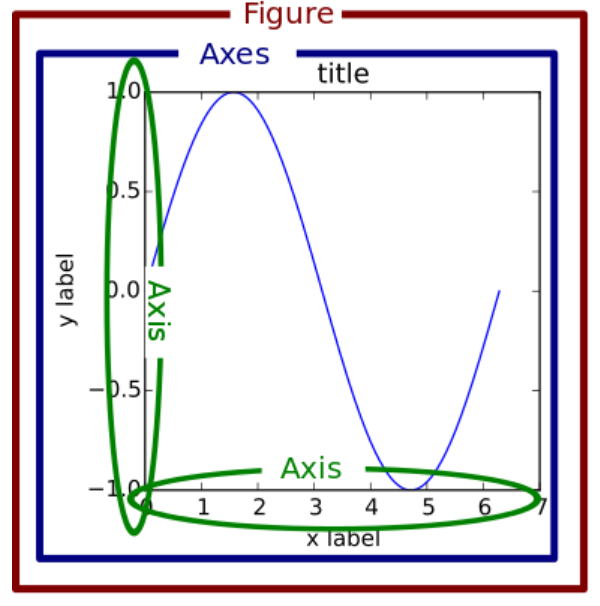
</div>


## Categorical variables

For this part of the exerceise, we will use the dataset of adult incomes in the United States, derived from the 1994 census database. The task of the adult dataset is to predict whether a worker has an income of over 50,000 or under 50,000.
Please, place the downloaded csv file *census_data* in the same directory as your notebook and import it.



In [ ]:
import pandas as pd
data = pd.read_csv('census_data.csv', index_col=False)
# For illustration purposes, we only select some of the columns
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

In [ ]:
data.dtypes

The workclass, education, sex, and occupation features are categorical features. All of them come from a fixed list of possible values, as opposed to a range, and denote a qualitative property, as opposed to a quantity. In our example, target variable is income, and it is also categorical.

### One hot encoding

By far the most common way to represent categorical variables is using the one-hot-encoding or one-out-of-N encoding, also known as dummy variables. The idea behind dummy variables is to replace a categorical variable with one or more new features that can have the values 0 and 1. The values 0 and 1 make sense in the formula for linear binary classification (and for all other models in scikit-learn), and we can represent any number of categories by introducing one new feature per category, as described here.

Let's see the values that the workclass feature can take.

In [ ]:
data.workclass.value_counts()

Let's apply pandas function *get_dummies* to do one hot encoding.

In [ ]:
data_dummies = pd.get_dummies(data)
data.shape
data_dummies.shape
data_dummies.columns
data_dummies.dtypes

We can see that the continuous features age and hours-per-week were not touched, while the categorical features were expanded into one new feature for each possible value. The get_dummies function in pandas treats all numbers as continuous and will not create dummy variables for them. If we have a categorical feature with values as numbers, we should then explicitely list it for dummy coding.

In [ ]:
data_dummies.head()

In this example, we called *get_dummies* on a DataFrame containing both the training and the test data. This is important to ensure categorical values are represented in the same way in the training set and the test set. 
We could have done it separetely, but in that case we would need to ensure that both datasets contain the same categories for all features.

Sklearn has also a function for one hot encoding. Using scikit-learn has the advantage of making it easy to treat training and test set in a consistent way. *OneHotEncoder* assumes all features are categorical. Hence, we use *make_column_transformer* class which allows us to apply different transformations to different columns in the input data. 

Each transformation in the *make_column_transformer* is specified by the transformer object and the columns this transformer should be applied to. The columns can be specified using column names, integer indices, or boolean masks. Each transformer is applied to the corresponding columns, and the result of the transformations are concatenated (horizontally).

Let's scale our numerical variables and convert our categorical to dummy variables. Note that we could also drop one dummy-encoded column per feature, especially if we are using a linear-based model. We could do this with *OneHotEncoder(sparse = False, drop ='first')*.  

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']),
    ( OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'] ))


Now, let's split our data into train and test. Since income variable is our target, we will drop it form the X train. Then, let's fit our *make_column_transformer* to our train data and then transform it.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# get all columns apart from income for the features
data_features = data.drop("income", axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(  data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_train.shape
X_train_trans.shape

We can see that we obtained 44 features, the same as when we used *pd.get_dummies* before (excluding two income variables: income_ <=50K ,income_ >50K), but here we also scaled the continuous features. Now, we can build a LogisticRegression model:

In [ ]:
from sklearn.metrics import classification_report
logreg = LogisticRegression(solver="liblinear", random_state=42)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
y_pred=logreg.predict(X_test_trans)
print(classification_report(y_test, y_pred))


### Ordinal encoding

Categorical ordinal variables have categories that follow a logical ordering. Some examples of ordinal data include:
- Socioeconomic status (low income, middle income or high income)
- Education level (high school, bachelor’s degree, master’s degree or PhD)
- Satisfaction rating (extremely dislike, dislike, neutral, like or extremely like).

Ordinal variables are encoded using scikit-learn *OrdinalEncoder*. In order to use *OrdinalEncoder*, we have to first specify the order in which we would like to encode our ordinal variable. In our case let's encode education level with ordinal encoder (let's assume some ranking between the education levels). Also, let's strip all trailing whitespaces in the education values (to avoid having ' Masters' instead of 'Masters'). 
For illustration on how to do encoding with multiple variables, we will also encode gender.

In [ ]:
data_features = data.drop("income", axis=1)
data_features['education']=data_features['education'].str.strip()
data_features['gender']=data_features['gender'].str.strip()
data_features.education.value_counts()
data_features.gender.value_counts()
X_train, X_test, y_train, y_test = train_test_split( data_features, data.income, random_state=0)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
categories=[['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Some-college','Bachelors','Masters','Doctorate'],['Female','Male']]
#Instantiate ordinal encoder
encoder = OrdinalEncoder(categories=categories)
#Fit ordinal encoder
encoder.fit(X_train[['education','gender']] )
encoder.categories_
# transform the data
X_train_trans = X_train.copy()
X_test_trans = X_test.copy()
X_train_trans[['education','gender']] = encoder.transform(X_train[['education','gender']]  )
X_test_trans[['education','gender']] = encoder.transform(X_test[['education','gender']]  )

### Practice question
Try encoding education variable with one hot encoding and ordinal encoding and compare the model performance (Logistic Regression was used here, but you can also test for some other classifier).

## Feature selection
With so many ways to create new features, we might get tempted to increase the dimensionality of the data way beyond the number of original features. However, adding more features makes all models more complex, and so increases the chance of overfitting. When adding new features, or with high-dimensional datasets in general, it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest. This can lead to simpler models that generalize better. But how can we know how good each feature is? 
Here we will demonstrate some supervised methods for feature selection, meaning they need the target for fitting the model. This means we need to split the data into training and test sets, and fit the feature selection only on the training part of the data.

### Filter methods (univariate)

For this method, we compute whether there is a statistically significant relationship between each feature and the target. Then the features that are related with the highest confidence are selected. In the case of classification, this is also known as analysis of variance (ANOVA). A key property of these tests is that they are univariate, meaning that they only consider each feature individually. Consequently, a feature will be discarded if it is only informative when combined with another feature. Univariate tests are often very fast to compute, and don’t require building a model. On the other hand, they are completely independent of the model that you might want to apply after the feature selection.

To use univariate feature selection in scikit-learn, we need to choose a test, usually either *f_classif* (the default) for classification or *f_regression* for regression, and a method to discard features based on the p-values determined in the test. All methods for discarding parameters use a threshold to discard all features with too high a p-value (which means they are unlikely to be related to the target). 

The methods differ in how they compute this threshold, with the simplest ones being *SelectKBest*, which selects a fixed number k of features, and *SelectPercentile*, which selects a fixed percentage of features. Let’s apply the feature selection for classification on the cancer dataset. To make the task a bit harder, we’ll add some noninformative noise features to the data. We expect the feature selection to be able to identify the features that are noninformative and remove them.

In [ ]:
from sklearn.feature_selection import SelectPercentile
from sklearn import datasets 

cancer = datasets.load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
#np.hstack: Stack arrays in sequence horizontally (column wise).
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(    X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

As we can see, the number of features was reduced from 80 to 40 (50 percent of the original number of features). We can find out which features have been selected using the *get_support* method, which returns a Boolean mask of the selected features.

In [ ]:
mask = select.get_support()
print(mask)

The first 30 features are from the dataset, the next 50 are noise. We can see that the most of the selected features are the original features, and most of the noise features were removed. However, the recovery of the original features is not perfect.

### Model-based (embedded)
Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. The supervised model that is used for feature selection doesn’t need to be the same model that is used for the final supervised modeling. The feature selection model needs to provide some measure of importance for each feature, so that they can be ranked by this measure. Decision trees and decision tree–based models provide a feature_importances_ attribute, which directly encodes the importance of each feature. Linear models have coefficients, which can also be used to capture feature importances by considering the absolute values. Linear models with L1 penalty learn sparse coefficients, which only use a small subset of features. This can be viewed as a form of feature selection for the model itself, but can also be used as a preprocessing step to select features for another model. In contrast to univariate selection, model-based selection considers all features at once, and so can capture interactions (if the model can capture them). To use model-based feature selection, we need to use the *SelectFromModel* transformer.
One parameter of *SelectFromModel* is *threshold* which defines which features to keep: features whose importance is greater or equal than the threshold are kept while the others are discarded.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
select = SelectFromModel(LogisticRegression(solver='liblinear'),  threshold='median')
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

In [ ]:
mask = select.get_support()
print(mask)


###  Wrapper methods
In this type of feature selection, a series of models are built, with varying numbers of features. One particular method of this kind is recursive feature elimination (RFE), which starts with all features, builds a model, and discards the least important feature according to the model. Then a new model is built using all but the discarded feature, and so on until only a prespecified number of features are left. For this to work, the model used for selection needs to provide some way to determine feature importance, as was the case for the model-based selection.

In [ ]:
from sklearn.feature_selection import RFE
select = RFE(LogisticRegression(solver='liblinear'),   n_features_to_select=40)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
print(mask)

## Dimensionality reduction

## Principal component analysis
Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

One of the common applications of PCA is visualizing high-dimensional datasets. It is hard to create scatter plots of data that has more than two features. If we want to look at the Breast Cancer dataset, even using a pair plot is tricky. The breast cancer dataset has 30 features, which would result in 30 * 29 / 2 = 435 scatter plots.

There is an even simpler visualization we can use, though—computing histograms of each of the features for the two classes, benign and malignant cancer.

In [ ]:
cancer = datasets.load_breast_cancer()
cancer.data.shape
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]


In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
# ravel() function is used to create a contiguous flattened array.
ax = axes.ravel()

# plot for each of the 30 features
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='green', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
#pass statement is a null statement, does nothing.
#But we set the interactivity of the notebook to 'all', and hence we would get outputs from all of the above statements.
#To avoid this, we can put pass; and this suppresses the above output which would clutter the display.
pass;

Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range (called a bin). Each plot overlays two histograms, one for all of the points in the benign class and one for all the points in the malignant class. This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples. For example, the feature *“smoothness error”* seems quite uninformative, because the two histograms mostly overlap, while the feature *“worst concave points”* seems quite informative, because the histograms are quite disjoint.

However, this plot doesn’t show us anything about the interactions between variables and how these relate to the classes. Using PCA, we can capture the main interactions and get a slightly more complete picture. We can find the first two principal components, and visualize the data in this new two-dimensional space with a single scatter plot.

Before we apply PCA, we scale our data so that each feature has unit variance using *StandardScaler*.

In [ ]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and dimensionality reduction by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object.

This is specified with the parameter *n_components*, if n_components is not set all components are kept.

In [ ]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA()
# fit PCA model to breast cancer data
pca.fit(X_scaled)

print('number of components is',pca.n_components_)


A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components.

PCA returns attribute: *explained_variance_* of shape (n_components,) which represents the amount of variance explained by each of the selected components, and is equal to n_components largest eigenvalues of the covariance matrix of X.

It also has the attribute *explained_variance_ratio_* of shape (n_components,) which represents the percentage of variance explained by each of the selected components.

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

From this we can see that by using 4, out of 30 components, we can explain around 80% of variance in data. And with 7 components, we explain around 90%.

We can also look at the proportion of variance explained by each component.

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Let us now take only 2 components.

In [ ]:
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Now, let's plot the data using only 2 components which eplain 63% of variance in data.

In [ ]:
cancer.target_names

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[cancer.target == 0, 0], X_pca[cancer.target == 0, 1], c='red', s=30, label='malignant')
plt.scatter(X_pca[cancer.target == 1, 0], X_pca[cancer.target == 1, 1], c='blue', s=30, label='benign')
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.legend()
pass;

It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data. For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points. We can see that the two classes separate quite well even in this two-dimensional space. This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes. We can also see that the malignant points are more spread out than the benign points—something that we could already see a bit from the histograms.

A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex, as we’ll see shortly. The principal components themselves are stored in the *components_* attribute of the PCA object during fitting.

In [ ]:
print("PCA component shape: {}".format(pca.components_.shape))

Each row in *components_* corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.). The columns correspond to the original features attribute of the PCA in this example, *“mean radius”*, *“mean texture”* and so on. Let’s have a look at the content of *components_*:

In [ ]:
print("PCA components:\n{}".format(pca.components_))

We can see that in the first component, all features have the same sign. That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. The second component has mixed signs, and both of the components involve all of the 30 features. This mixing of all features is what makes explaining the axes tricky.

## t-SNE
While PCA is often a good first approach for transforming data so that we might be able to visualize it using a scatter plot, the nature of the method (applying a rotation and then dropping directions) limits its usefulness. There is a class of algorithms for visualization called manifold learning algorithms that allow for much more complex mappings, and often provide better visualizations. A particularly useful one is the t-SNE algorithm.

Manifold learning algorithms are mainly aimed at visualization, and so are rarely used to generate more than two new features. Some of them, including t-SNE, compute a new representation of the training data, but don’t allow transformations of new data. This means these algorithms cannot be applied to a test set: rather, they can only transform the data they were trained for. Manifold learning can be useful for exploratory data analysis, but is rarely used if the final goal is supervised learning. The idea behind t-SNE is to find a two-dimensional representation of the data that preserves the distances between points as best as possible. t-SNE starts with a random two-dimensional representation for each data point, and then tries to make points that are close in the original feature space closer, and points that are far apart in the original feature space farther apart. t-SNE puts more emphasis on points that are close by, rather than preserving distances between far-apart points. In other words, it tries to preserve the information indicating which points are neighbors to each other.

Let's now generate some data using *make_swiss_roll* and visualize it using t-SNE. Note that for t-SNE, we use fit_transform instead of fit, as TSNE has no transform method.

In [ ]:
from sklearn.datasets import make_swiss_roll
X, color = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
X_scaled =scaler.fit_transform(X)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42,  perplexity = 10)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_tsne.shape)))

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],  s=30, c=color , cmap=plt.cm.Spectral)
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

One of the parameters of TSNE is *perplexity*. It is related to the number of nearest neighbors that is used in other manifold learning algorithms. 
Larger datasets usually require a larger perplexity. 
Consider selecting a value between 5 and 50. Different values can result in significantly different results.
You should try changing the value to see its impact.

### Practice question

Use Iris dataset and visualize it using PCA and t-SNE. Try changing the values of *perpelexity* paramater in t-SNE.